In [1]:
import pyeem

In [2]:
cal_sources = {"chloropyhll": "ug/l"}
dataset = pyeem.datasets.Dataset(
    data_dir="demo_data/qinmin",
    raman_instrument=None,
    absorbance_instrument="cary_4e",
    eem_instrument="cary_eclipse",
    calibration_sources=cal_sources,
    mode="w"
)

In [3]:
display(dataset.meta_df.head())

datetime_utc         filename  \
sample_set scan_type                                         
1          sample_eem 2020-07-29 10:30:00  sample_eem1.csv   
2          sample_eem 2020-07-29 10:45:00  sample_eem1.csv   
3          blank_eem  2020-08-04 11:00:00   blank_eem1.csv   
           sample_eem 2020-08-04 12:00:00  sample_eem1.csv   
           sample_eem 2020-08-04 13:00:00  sample_eem2.csv   

                                                        description comments  \
sample_set scan_type                                                           
1          sample_eem  Emission: [500, 800], Excitation: [400, 425]            
2          sample_eem  Emission: [560, 800], Excitation: [480, 516]            
3          blank_eem                                                           
           sample_eem                                                          
           sample_eem                                                          

                      collected_by  dilution  chloropyhll  phycocyanin  \
sample_set scan_type                                                     
1          sample_eem         Anna       1.0          0.0          NaN   
2          sample_eem         Anna       1.0          0.0          NaN   
3          blank_eem                     1.0          0.0          NaN   
           sample_eem         Anna       1.0        600.0          NaN   
           sample_eem         Anna       1.0       6000.0          NaN   

                       fucoxanthin  calibration_sample  prototypical_sample  \
sample_set scan_type                                                          
1          sample_eem          NaN               False                False   
2          sample_eem          NaN               False                False   
3          blank_eem           NaN               False                False   
           sample_eem          NaN                True                False   
           sample_eem          NaN                True                False   

                       test_sample  \
sample_set scan_type                 
1          sample_eem        False   
2          sample_eem        False   
3          blank_eem         False   
           sample_eem        False   
           sample_eem        False   

                                                                filepath  \
sample_set scan_type                                                       
1          sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
2          sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
3          blank_eem   /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   
           sample_eem  /home/roboat/Documents/roboat/PyEEM/examples/d...   

                              name                       hdf_path  
sample_set scan_type                                               
1          sample_eem  sample_eem1  raw_sample_sets/1/sample_eem1  
2          sample_eem  sample_eem1  raw_sample_sets/2/sample_eem1  
3          blank_eem    blank_eem1   raw_sample_sets/3/blank_eem1  
           sample_eem  sample_eem1  raw_sample_sets/3/sample_eem1  
           sample_eem  sample_eem2  raw_sample_sets/3/sample_eem2

In [4]:
dataset.metadata_summary_info()

,Date Range,Number of Sample Sets,Number of blank EEMs,Number of sample EEMs,Number of water raman scans,Number of absorbance scans
0,"(Timestamp('2020-07-29 10:30:00'), Timestamp('...",3,1,4,0,0


In [5]:
routine_df = pyeem.preprocessing.create_routine(
    crop = False,
    discrete_wavelengths = False,
    gaussian_smoothing = False,
    blank_subtraction = True,
    inner_filter_effect = False,
    raman_normalization = False,
    scatter_removal = True,
    dilution = False,
)

display(routine_df)

,step_name,hdf_path
step_order,,
0,raw,raw_sample_sets/
1,blank_subtraction,preprocessing/corrections/blank_subtraction
2,scatter_removal,preprocessing/corrections/scatter_removal
3,complete,preprocessing/complete/


In [6]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "metadata",
    fill="interp",
    progress_bar=True
)
display(routine_results_df)

Preprocessing scan sets: 100%|██████████| 3/3 [00:06<00:00,  2.15s/it]


step_completed  \
sample_set scan_type  name        step_name                          
1          blank_eem  NaN         raw                          NaN   
           sample_eem sample_eem1 raw                         True   
                                  blank_subtraction          False   
                                  scatter_removal             True   
                                  complete                    True   
2          blank_eem  NaN         raw                          NaN   
           sample_eem sample_eem1 raw                         True   
                                  blank_subtraction          False   
                                  scatter_removal             True   
                                  complete                    True   
3          blank_eem  blank_eem1  raw                         True   
           sample_eem sample_eem1 raw                         True   
                                  blank_subtraction           True   
                                  scatter_removal             True   
                                  complete                    True   
                      sample_eem2 raw                         True   
                                  blank_subtraction           True   
                                  scatter_removal             True   
                                  complete                    True   

                                                                                 step_exception  \
sample_set scan_type  name        step_name                                                       
1          blank_eem  NaN         raw                                                       NaN   
           sample_eem sample_eem1 raw                                                      None   
                                  blank_subtraction  'NoneType' object has no attribute 'shape'   
                                  scatter_removal                                          None   
                                  complete                                                 None   
2          blank_eem  NaN         raw                                                       NaN   
           sample_eem sample_eem1 raw                                                      None   
                                  blank_subtraction  'NoneType' object has no attribute 'shape'   
                                  scatter_removal                                          None   
                                  complete                                                 None   
3          blank_eem  blank_eem1  raw                                                      None   
           sample_eem sample_eem1 raw                                                      None   
                                  blank_subtraction                                        None   
                                  scatter_removal                                          None   
                                  complete                                                 None   
                      sample_eem2 raw                                                      None   
                                  blank_subtraction                                        None   
                                  scatter_removal                                          None   
                                  complete                                                 None   

                                                                                              hdf_path  \
sample_set scan_type  name        step_name                                                              
1          blank_eem  NaN         raw                                                              NaN   
           sample_eem sample_eem1 raw                                    raw_sample_sets/1/sample_eem1   
                                  blank_subtraction                          

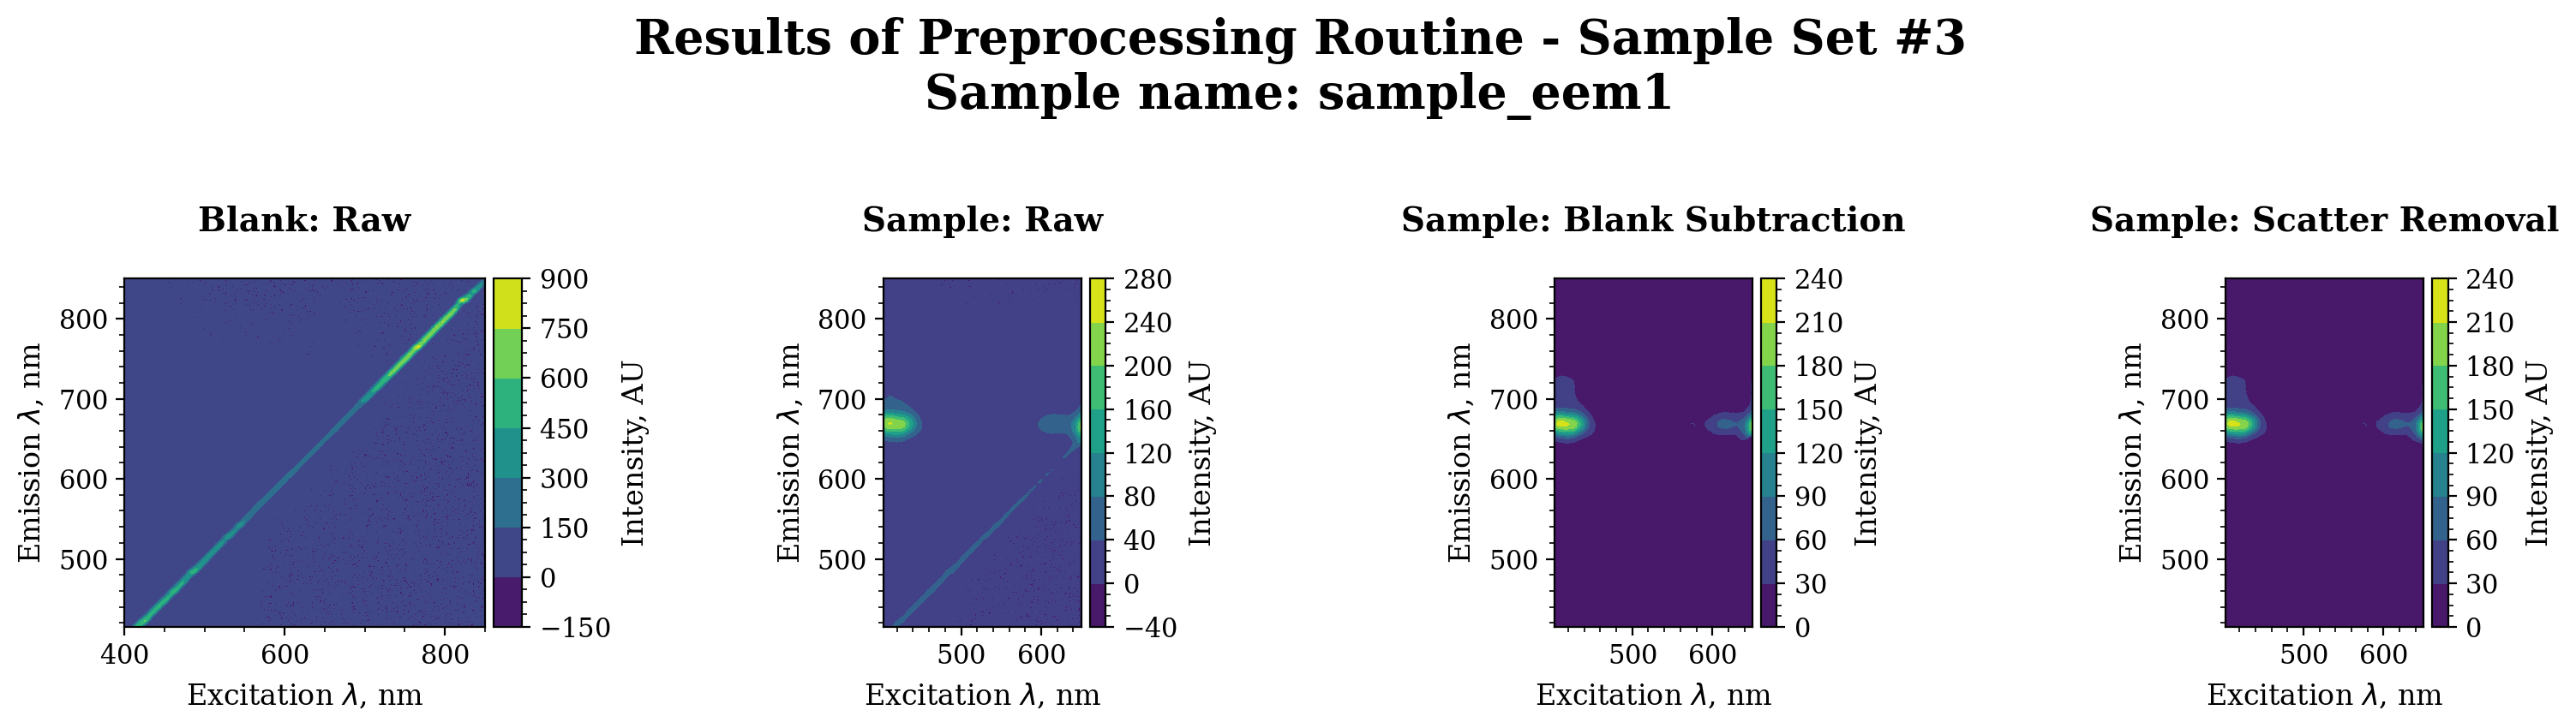

In [7]:
import matplotlib.pyplot as plt

sample_set = 3
sample_name = "sample_eem1"
axes = pyeem.plots.plot_preprocessing(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

In [8]:
cal_df = pyeem.preprocessing.calibration(dataset, routine_results_df)
display(cal_df)

concentration  \
source      source_units intensity_units measurement_units        slope     intercept     r_squared                  
chloropyhll ug/l         Intensity, AU   Integrated Intensity, AU 88.296866 826445.913877 1.0                600.0   
                                                                                          1.0               6000.0   

                                                                                                     integrated_intensity  \
source      source_units intensity_units measurement_units        slope     intercept     r_squared                         
chloropyhll ug/l         Intensity, AU   Integrated Intensity, AU 88.296866 826445.913877 1.0                8.794240e+05   
                                                                                          1.0                1.356227e+06   

                                                                                                     prototypical_sample  \
source      source_units intensity_units measurement_units        slope     intercept     r_squared                        
chloropyhll ug/l         Intensity, AU   Integrated Intensity, AU 88.296866 826445.913877 1.0                      False   
                                                                                          1.0                      False   

                                                                                                                                 hdf_path  
source      source_units intensity_units measurement_units        slope     intercept     r_squared                                        
chloropyhll ug/l         Intensity, AU   Integrated Intensity, AU 88.296866 826445.913877 1.0        preprocessing/complete/3/sample_eem1  
                                                                                          1.0        preprocessing/complete/3/sample_eem2

In [9]:
cal_summary_df = pyeem.preprocessing.calibration_summary_info(cal_df)
display(cal_summary_df)

,source,source_units,intensity_units,measurement_units,slope,intercept,r_squared,Number of Samples,Min. Concentration,Max. Concentration
0,chloropyhll,ug/l,"Intensity, AU","Integrated Intensity, AU",88.296866,826445.913877,1.0,2,600.0,6000.0


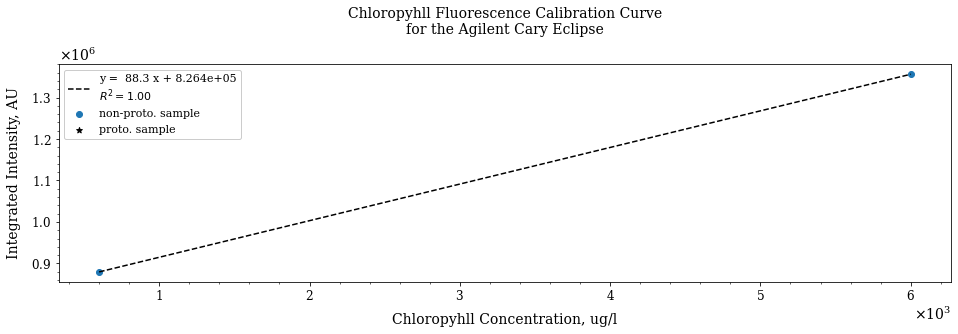

In [10]:
axes = pyeem.plots.plot_calibration_curves(dataset, cal_df)
plt.show()